# 

In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, average_precision_score

In [2]:
data = pd.read_csv('Crime_Incidents_20240216.csv')

In [3]:
data.head()

Case Number       Incident Datetime  Incident ID Incident Type Primary  \
0  16-1660403  06/14/2016 01:20:00 AM          NaN               ASSAULT   
1  16-3480266  12/13/2016 05:00:00 AM          NaN         LARCENY/THEFT   
2  20-2010167  07/19/2020 03:09:00 AM          NaN               ASSAULT   
3  14-3210732  11/17/2014 08:08:00 AM          NaN         LARCENY/THEFT   
4  15-1100268  04/20/2015 10:22:00 AM          NaN         LARCENY/THEFT   

                                Incident Description Parent Incident Type  \
0                                            ASSAULT              Assault   
1                                      LARCENY/THEFT                Theft   
2  Buffalo Police are investigating this report o...              Assault   
3                                      LARCENY/THEFT                Theft   
4                                      LARCENY/THEFT                Theft   

   Hour of Day Day of Week                      Address     City  ...  \
0            1     Tuesday  E AMHERST ST & E AMHERST ST  Buffalo  ...   
1            5     Tuesday      1000 Block E LOVEJOY ST  Buffalo  ...   
2            3      Sunday    GRIDER ST & KENSINGTON WB  Buffalo  ...   
3            8      Monday        2100 Block ELMWOOD AV  Buffalo  ...   
4           10      Monday        2100 Block ELMWOOD AV  Buffalo  ...   

  Census Block Group Census Block 2010 Census Tract  2010 Census Block Group  \
0                  2         2003                 55                       2   
1                  4         4001                 23                       4   
2                NaN          NaN                NaN                     NaN   
3                  2         2007                 56                       2   
4                  2         2007                 56                       2   

  2010 Census Block  Police District TRACTCE20 GEOID20_tract  \
0              2005       District D    005500   36029005500   
1              4001       District C    002300   36029002300   
2               NaN              NaN   UNKNOWN       UNKNOWN   
3              2008       District D    005600   36029005600   
4              2008       District D    005600   36029005600   

  GEOID20_blockgroup    GEOID20_block  
0       360290001102  360290170002003  
1       360290002004  360290034004001  
2            UNKNOWN          UNKNOWN  
3       360290001102  360290163002007  
4       360290001102  360290163002007  

[5 rows x 31 columns]

In [4]:
#Data cleaning 01 
#changing column names.
data.rename(columns={'Incident Type Primary': 'Incident_Type', 'Case Number': 'Case_Number','Incident ID':'Incident_ID', 'Incident Description':'Incident_Description', 'Parent Incident Type':'Parent_Incident', 'Hour of Day':'Hour_of_Day', 'Day of Week':'Day', 'Census Block Group':'Census_Block_Group', 'Census Block':'Census_Block', '2010 Census Tract':'2010_Census_Tract', '2010 Census Block Group':'2010_Census_Block_Group', '2010 Census Block':"2010_Census_Block", "Incident Datetime":"Incident_Datetime",'Police District':'Police_District', 'neighborhood':'Neighborhood' ,"Council District":"Council_District","Council_District_2011 ":"Council_District_2011"}, inplace=True)

In [5]:
data.head()

Case_Number       Incident_Datetime  Incident_ID  Incident_Type  \
0  16-1660403  06/14/2016 01:20:00 AM          NaN        ASSAULT   
1  16-3480266  12/13/2016 05:00:00 AM          NaN  LARCENY/THEFT   
2  20-2010167  07/19/2020 03:09:00 AM          NaN        ASSAULT   
3  14-3210732  11/17/2014 08:08:00 AM          NaN  LARCENY/THEFT   
4  15-1100268  04/20/2015 10:22:00 AM          NaN  LARCENY/THEFT   

                                Incident_Description Parent_Incident  \
0                                            ASSAULT         Assault   
1                                      LARCENY/THEFT           Theft   
2  Buffalo Police are investigating this report o...         Assault   
3                                      LARCENY/THEFT           Theft   
4                                      LARCENY/THEFT           Theft   

   Hour_of_Day      Day                      Address     City  ...  \
0            1  Tuesday  E AMHERST ST & E AMHERST ST  Buffalo  ...   
1            5  Tuesday      1000 Block E LOVEJOY ST  Buffalo  ...   
2            3   Sunday    GRIDER ST & KENSINGTON WB  Buffalo  ...   
3            8   Monday        2100 Block ELMWOOD AV  Buffalo  ...   
4           10   Monday        2100 Block ELMWOOD AV  Buffalo  ...   

  Census_Block_Group Census_Block 2010 Census Tract  2010_Census_Block_Group  \
0                  2         2003                 55                       2   
1                  4         4001                 23                       4   
2                NaN          NaN                NaN                     NaN   
3                  2         2007                 56                       2   
4                  2         2007                 56                       2   

  2010_Census_Block  Police_District TRACTCE20 GEOID20_tract  \
0              2005       District D    005500   36029005500   
1              4001       District C    002300   36029002300   
2               NaN              NaN   UNKNOWN       UNKNOWN   
3              2008       District D    005600   36029005600   
4              2008       District D    005600   36029005600   

  GEOID20_blockgroup    GEOID20_block  
0       360290001102  360290170002003  
1       360290002004  360290034004001  
2            UNKNOWN          UNKNOWN  
3       360290001102  360290163002007  
4       360290001102  360290163002007  

[5 rows x 31 columns]

In [6]:
#datacleaning 02
#Handling columns with single values.
new_data = data.drop(columns=['City', 'State',], inplace=True)

In [7]:
print(data.columns)

Index(['Case_Number', 'Incident_Datetime', 'Incident_ID', 'Incident_Type',
       'Incident_Description', 'Parent_Incident', 'Hour_of_Day', 'Day',
       'Address', 'Location', 'Latitude', 'Longitude', 'Created At',
       'updated_at', 'zip_code', 'Neighborhood', 'Council_District',
       'Council District 2011', 'Census Tract', 'Census_Block_Group',
       'Census_Block', '2010 Census Tract ', '2010_Census_Block_Group',
       '2010_Census_Block', 'Police_District', 'TRACTCE20', 'GEOID20_tract',
       'GEOID20_blockgroup', 'GEOID20_block'],
      dtype='object')


In [8]:
#data cleaning 03
#Rectifying Datatypes
data.dtypes

Case_Number                 object
Incident_Datetime           object
Incident_ID                float64
Incident_Type               object
Incident_Description        object
Parent_Incident             object
Hour_of_Day                  int64
Day                         object
Address                     object
Location                    object
Latitude                    object
Longitude                   object
Created At                  object
updated_at                 float64
zip_code                    object
Neighborhood                object
Council_District            object
Council District 2011       object
Census Tract                object
Census_Block_Group          object
Census_Block                object
2010 Census Tract           object
2010_Census_Block_Group     object
2010_Census_Block           object
Police_District             object
TRACTCE20                   object
GEOID20_tract               object
GEOID20_blockgroup          object
GEOID20_block       

In [9]:
#changing datatype of zipcode
data["zip_code"].replace('UNKNOWN', np.nan, inplace = True)
data = data.dropna(subset=['zip_code'])
data['zip_code'] = data['zip_code'].astype(int)
warnings.filterwarnings("ignore")

data

Case_Number       Incident_Datetime  Incident_ID  Incident_Type  \
0       16-1660403  06/14/2016 01:20:00 AM          NaN        ASSAULT   
1       16-3480266  12/13/2016 05:00:00 AM          NaN  LARCENY/THEFT   
3       14-3210732  11/17/2014 08:08:00 AM          NaN  LARCENY/THEFT   
4       15-1100268  04/20/2015 10:22:00 AM          NaN  LARCENY/THEFT   
5       15-1000814  04/10/2015 03:00:00 AM          NaN       BURGLARY   
...            ...                     ...          ...            ...   
305197  24-0460198  02/15/2024 07:23:49 AM          NaN  LARCENY/THEFT   
305198  24-0460401  02/15/2024 10:58:05 AM          NaN  LARCENY/THEFT   
305199  24-0450864  02/14/2024 05:54:27 PM          NaN        ASSAULT   
305200  24-0430673  02/11/2024 09:30:50 PM          NaN            UUV   
305201  24-0450594  02/14/2024 02:26:33 PM          NaN  LARCENY/THEFT   

                                     Incident_Description  \
0                                                 ASSAULT   
1                                           LARCENY/THEFT   
3                                           LARCENY/THEFT   
4                                           LARCENY/THEFT   
5                                                BURGLARY   
...                                                   ...   
305197  Buffalo Police are investigating this report o...   
305198  Buffalo Police are investigating this report o...   
305199  Buffalo Police are investigating this report o...   
305200  Buffalo Police are investigating this report o...   
305201  Buffalo Police are investigating this report o...   

            Parent_Incident  Hour_of_Day        Day  \
0                   Assault            1    Tuesday   
1                     Theft            5    Tuesday   
3                     Theft            8     Monday   
4                     Theft           10     Monday   
5       Breaking & Entering            3     Friday   
...                     ...          ...        ...   
305197                Theft            7   Thursday   
305198                Theft           10   Thursday   
305199              Assault           17  Wednesday   
305200     Theft of Vehicle           14     Monday   
305201                Theft           14  Wednesday   

                            Address                Location  ...  \
0       E AMHERST ST & E AMHERST ST  POINT (-78.889 42.938)  ...   
1           1000 Block E LOVEJOY ST  POINT (-78.809 42.889)  ...   
3             2100 Block ELMWOOD AV  POINT (-78.879 42.954)  ...   
4             2100 Block ELMWOOD AV  POINT (-78.879 42.954)  ...   
5             400 Block GLENWOOD AV  POINT (-78.848 42.913)  ...   
...                             ...                     ...  ...   
305197     400 Block CONNECTICUT ST  POINT (-78.885 42.908)  ...   
305198       400 Block DARTMOUTH AV  POINT (-78.808 42.943)  ...   
305199          0 Block BECKWITH ST  POINT (-78.851 42.893)  ...   
305200       100 Block PARKRIDGE AV  POINT (-78.822 42.938)  ...   
305201         600 Block AMHERST ST   POINT (-78.816 42.94)  ...   

       Census_Block_Group Census_Block 2010 Census Tract   \
0                       2         2003                 55   
1                       4         4001                 23   
3                       2         2007                 56   
4                       2         2007                 56   
5                       3         3009              33.02   
...                   ...          ...                ...   
305197                  1         1008              67.01   
305198                  2         2003                 43   
305199                  4         4016                166   
305200                  5         5003                 42   
305201                  1         1000                 42   

        2010_Census_Block_Group  2010_Census_Block Police_District TRACTCE20  \
0                             2               2005      District D    005500   
1             

In [10]:
#cleaning 04
#Handling date and time
data['Incident_Datetime'] = pd.to_datetime(data['Incident_Datetime'])

data['Date'] = data['Incident_Datetime'].dt.date
data['Time'] = data['Incident_Datetime'].dt.time

warnings.filterwarnings("ignore")
data.drop(columns=['Incident_Datetime'], inplace=True)
print(data)

       Case_Number  Incident_ID  Incident_Type  \
0       16-1660403          NaN        ASSAULT   
1       16-3480266          NaN  LARCENY/THEFT   
3       14-3210732          NaN  LARCENY/THEFT   
4       15-1100268          NaN  LARCENY/THEFT   
5       15-1000814          NaN       BURGLARY   
...            ...          ...            ...   
305197  24-0460198          NaN  LARCENY/THEFT   
305198  24-0460401          NaN  LARCENY/THEFT   
305199  24-0450864          NaN        ASSAULT   
305200  24-0430673          NaN            UUV   
305201  24-0450594          NaN  LARCENY/THEFT   

                                     Incident_Description  \
0                                                 ASSAULT   
1                                           LARCENY/THEFT   
3                                           LARCENY/THEFT   
4                                           LARCENY/THEFT   
5                                                BURGLARY   
...                              

In [11]:
#Cleaning 05
#Feature engineering 
#Extracting features from date column
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
warnings.filterwarnings("ignore")
print(data)

       Case_Number  Incident_ID  Incident_Type  \
0       16-1660403          NaN        ASSAULT   
1       16-3480266          NaN  LARCENY/THEFT   
3       14-3210732          NaN  LARCENY/THEFT   
4       15-1100268          NaN  LARCENY/THEFT   
5       15-1000814          NaN       BURGLARY   
...            ...          ...            ...   
305197  24-0460198          NaN  LARCENY/THEFT   
305198  24-0460401          NaN  LARCENY/THEFT   
305199  24-0450864          NaN        ASSAULT   
305200  24-0430673          NaN            UUV   
305201  24-0450594          NaN  LARCENY/THEFT   

                                     Incident_Description  \
0                                                 ASSAULT   
1                                           LARCENY/THEFT   
3                                           LARCENY/THEFT   
4                                           LARCENY/THEFT   
5                                                BURGLARY   
...                              

In [12]:
#Cleaning 06
#droping the cols that are not contributing for the analysis

columns_to_drop = ['Incident_Description', 'Location', 'Latitude', 'Longitude', 'Created At', 'updated_at',
                   'GEOID20_block', 'GEOID20_blockgroup', 'GEOID20_tract', 'TRACTCE20', 'Census_Block_Group',
                   'Census_Block', '2010 Census Tract ', '2010_Census_Block_Group', '2010_Census_Block', 'Census Tract']

# Drop specified columns
data.drop(columns=columns_to_drop, inplace=True, axis=1)
data.head()

Case_Number  Incident_ID  Incident_Type      Parent_Incident  Hour_of_Day  \
0  16-1660403          NaN        ASSAULT              Assault            1   
1  16-3480266          NaN  LARCENY/THEFT                Theft            5   
3  14-3210732          NaN  LARCENY/THEFT                Theft            8   
4  15-1100268          NaN  LARCENY/THEFT                Theft           10   
5  15-1000814          NaN       BURGLARY  Breaking & Entering            3   

       Day                      Address  zip_code   Neighborhood  \
0  Tuesday  E AMHERST ST & E AMHERST ST     14207  Grant-Amherst   
1  Tuesday      1000 Block E LOVEJOY ST     14206        Lovejoy   
3   Monday        2100 Block ELMWOOD AV     14207    West Hertel   
4   Monday        2100 Block ELMWOOD AV     14207    West Hertel   
5   Friday        400 Block GLENWOOD AV     14208    Masten Park   

  Council_District Council District 2011 Police_District       Date      Time  \
0            NORTH                 NORTH      District D 2016-06-14  01:20:00   
1          LOVEJOY               LOVEJOY      District C 2016-12-13  05:00:00   
3            NORTH                 NORTH      District D 2014-11-17  08:08:00   
4            NORTH                 NORTH      District D 2015-04-20  10:22:00   
5           MASTEN                MASTEN      District C 2015-04-10  03:00:00   

   Year  Month  
0  2016      6  
1  2016     12  
3  2014     11  
4  2015      4  
5  2015      4

In [13]:
#cleaning 07 
#Text Cleaning

# Remove hyphens from 'Case_Number' and keep numeric characters
data['Case_Number'] = data['Case_Number'].str.replace('-', '')

# Convert the 'Case_Number' column to integer type
data['Case_Number'] = pd.to_numeric(data['Case_Number'], errors='coerce')

# Replace 'LARCENY/THEFT' with 'LARCENY'
data['Incident_Type'] = data['Incident_Type'].replace('LARCENY/THEFT', 'LARCENY')

# Replace 'UUV' with 'VEHICLE LOST'
data['Incident_Type'] = data['Incident_Type'].replace('UUV', 'VEHICLE LOST')

print(data)


        Case_Number  Incident_ID Incident_Type      Parent_Incident  \
0         161660403          NaN       ASSAULT              Assault   
1         163480266          NaN       LARCENY                Theft   
3         143210732          NaN       LARCENY                Theft   
4         151100268          NaN       LARCENY                Theft   
5         151000814          NaN      BURGLARY  Breaking & Entering   
...             ...          ...           ...                  ...   
305197    240460198          NaN       LARCENY                Theft   
305198    240460401          NaN       LARCENY                Theft   
305199    240450864          NaN       ASSAULT              Assault   
305200    240430673          NaN  VEHICLE LOST     Theft of Vehicle   
305201    240450594          NaN       LARCENY                Theft   

        Hour_of_Day        Day                      Address  zip_code  \
0                 1    Tuesday  E AMHERST ST & E AMHERST ST     14207   
1

In [14]:
#cleaning 08 
#Label Encoding
from sklearn.preprocessing import LabelEncoder
data = pd.DataFrame(data)
label_encoder = LabelEncoder()
data['Council_District_Encoded'] = label_encoder.fit_transform(data['Council_District'])




In [15]:
data

Case_Number  Incident_ID Incident_Type      Parent_Incident  \
0         161660403          NaN       ASSAULT              Assault   
1         163480266          NaN       LARCENY                Theft   
3         143210732          NaN       LARCENY                Theft   
4         151100268          NaN       LARCENY                Theft   
5         151000814          NaN      BURGLARY  Breaking & Entering   
...             ...          ...           ...                  ...   
305197    240460198          NaN       LARCENY                Theft   
305198    240460401          NaN       LARCENY                Theft   
305199    240450864          NaN       ASSAULT              Assault   
305200    240430673          NaN  VEHICLE LOST     Theft of Vehicle   
305201    240450594          NaN       LARCENY                Theft   

        Hour_of_Day        Day                      Address  zip_code  \
0                 1    Tuesday  E AMHERST ST & E AMHERST ST     14207   
1                 5    Tuesday      1000 Block E LOVEJOY ST     14206   
3                 8     Monday        2100 Block ELMWOOD AV     14207   
4                10     Monday        2100 Block ELMWOOD AV     14207   
5                 3     Friday        400 Block GLENWOOD AV     14208   
...             ...        ...                          ...       ...   
305197            7   Thursday     400 Block CONNECTICUT ST     14213   
305198           10   Thursday       400 Block DARTMOUTH AV     14215   
305199           17  Wednesday          0 Block BECKWITH ST     14212   
305200           14     Monday       100 Block PARKRIDGE AV     14215   
305201           14  Wednesday         600 Block AMHERST ST     14215   

             Neighborhood Council_District Council District 2011  \
0           Grant-Amherst            NORTH                 NORTH   
1                 Lovejoy          LOVEJOY               LOVEJOY   
3             West Hertel            NORTH                 NORTH   
4             West Hertel            NORTH                 NORTH   
5             Masten Park           MASTEN                MASTEN   
...                   ...              ...                   ...   
305197     Elmwood Bryant          NIAGARA               NIAGARA   
305198  Kensington-Bailey       UNIVERSITY            UNIVERSITY   
305199  Broadway Fillmore         ELLICOTT              ELLICOTT   
305200  Kensington-Bailey           MASTEN            UNIVERSITY   
305201  Kensington-Bailey           MASTEN                MASTEN   

       Police_District       Date      Time  Year  Month  \
0           District D 2016-06-14  01:20:00  2016      6   
1           District C 2016-12-13  05:00:00  2016     12   
3           District D 2014-11-17  08:08:00  2014     11   
4           District D 2015-04-20  10:22:00  2015      4   
5           District C 2015-04-10  03:00:00  2015      4   
...                ...        ...       ...   ...    ...   
305197      District B 2024-02-15  07:23:49  2024      2   
305198      District E 2024-02-15  10:58:05  2024      2   
305199      District C 2024-02-14  17:54:27  2024      2   
305200      District E 2024-02-11  21:30:50  2024      2   
305201      District E 2024-02-14  14:26:33  2024      2   

        Council_District_Encoded  
0                              6  
1                              3  
3                              6  
4                              6  
5                              4  
...                          ...  
305197                         5  
305198                         8  
305199                         1  
305200                         4  
305201                         4  

[302243 rows x 17 columns]

In [16]:
#cleaning 09
#Generating data for empty column
unique_incident_types = data['Incident_Type'].unique()

# Creating a mapping for each unique incident type to its corresponding ID
incident_id_map = {incident_type: index + 1 for index, incident_type in enumerate(unique_incident_types)}

# Assigning IDs to the "Incident ID" column based on the incident types
data['Incident_ID'] = data['Incident_Type'].map(incident_id_map)

print(data)

        Case_Number  Incident_ID Incident_Type      Parent_Incident  \
0         161660403            1       ASSAULT              Assault   
1         163480266            2       LARCENY                Theft   
3         143210732            2       LARCENY                Theft   
4         151100268            2       LARCENY                Theft   
5         151000814            3      BURGLARY  Breaking & Entering   
...             ...          ...           ...                  ...   
305197    240460198            2       LARCENY                Theft   
305198    240460401            2       LARCENY                Theft   
305199    240450864            1       ASSAULT              Assault   
305200    240430673            4  VEHICLE LOST     Theft of Vehicle   
305201    240450594            2       LARCENY                Theft   

        Hour_of_Day        Day                      Address  zip_code  \
0                 1    Tuesday  E AMHERST ST & E AMHERST ST     14207   
1

In [17]:
#Cleaning 10
#Removing rows with null values.
data.replace('UNKNOWN',pd.NA,inplace = True)
data

Case_Number  Incident_ID Incident_Type      Parent_Incident  \
0         161660403            1       ASSAULT              Assault   
1         163480266            2       LARCENY                Theft   
3         143210732            2       LARCENY                Theft   
4         151100268            2       LARCENY                Theft   
5         151000814            3      BURGLARY  Breaking & Entering   
...             ...          ...           ...                  ...   
305197    240460198            2       LARCENY                Theft   
305198    240460401            2       LARCENY                Theft   
305199    240450864            1       ASSAULT              Assault   
305200    240430673            4  VEHICLE LOST     Theft of Vehicle   
305201    240450594            2       LARCENY                Theft   

        Hour_of_Day        Day                      Address  zip_code  \
0                 1    Tuesday  E AMHERST ST & E AMHERST ST     14207   
1                 5    Tuesday      1000 Block E LOVEJOY ST     14206   
3                 8     Monday        2100 Block ELMWOOD AV     14207   
4                10     Monday        2100 Block ELMWOOD AV     14207   
5                 3     Friday        400 Block GLENWOOD AV     14208   
...             ...        ...                          ...       ...   
305197            7   Thursday     400 Block CONNECTICUT ST     14213   
305198           10   Thursday       400 Block DARTMOUTH AV     14215   
305199           17  Wednesday          0 Block BECKWITH ST     14212   
305200           14     Monday       100 Block PARKRIDGE AV     14215   
305201           14  Wednesday         600 Block AMHERST ST     14215   

             Neighborhood Council_District Council District 2011  \
0           Grant-Amherst            NORTH                 NORTH   
1                 Lovejoy          LOVEJOY               LOVEJOY   
3             West Hertel            NORTH                 NORTH   
4             West Hertel            NORTH                 NORTH   
5             Masten Park           MASTEN                MASTEN   
...                   ...              ...                   ...   
305197     Elmwood Bryant          NIAGARA               NIAGARA   
305198  Kensington-Bailey       UNIVERSITY            UNIVERSITY   
305199  Broadway Fillmore         ELLICOTT              ELLICOTT   
305200  Kensington-Bailey           MASTEN            UNIVERSITY   
305201  Kensington-Bailey           MASTEN                MASTEN   

       Police_District       Date      Time  Year  Month  \
0           District D 2016-06-14  01:20:00  2016      6   
1           District C 2016-12-13  05:00:00  2016     12   
3           District D 2014-11-17  08:08:00  2014     11   
4           District D 2015-04-20  10:22:00  2015      4   
5           District C 2015-04-10  03:00:00  2015      4   
...                ...        ...       ...   ...    ...   
305197      District B 2024-02-15  07:23:49  2024      2   
305198      District E 2024-02-15  10:58:05  2024      2   
305199      District C 2024-02-14  17:54:27  2024      2   
305200      District E 2024-02-11  21:30:50  2024      2   
305201      District E 2024-02-14  14:26:33  2024      2   

        Council_District_Encoded  
0                              6  
1                              3  
3                              6  
4                              6  
5                              4  
...                          ...  
305197                         5  
305198                         8  
305199                         1  
305200                         4  
305201                         4  

[302243 rows x 17 columns]

In [18]:

columns_to_exclude = ['Neighborhood', 'Address', 'Council District 2011', 'Council_District', 'Police_District']

# Drop rows with null values in all the specified columns
df_cleaned = data.dropna(subset=columns_to_exclude)


In [19]:
#Checking if all the null values are dropped.
df_cleaned.isna().sum()

Case_Number                 0
Incident_ID                 0
Incident_Type               0
Parent_Incident             0
Hour_of_Day                 0
Day                         0
Address                     0
zip_code                    0
Neighborhood                0
Council_District            0
Council District 2011       0
Police_District             0
Date                        0
Time                        0
Year                        0
Month                       0
Council_District_Encoded    0
dtype: int64

In [20]:
#Cleaning 11
#Normalizing data
from sklearn.preprocessing import MinMaxScaler

# Converting the col to array for reshaping.
hour_of_day = data['Hour_of_Day'].values.reshape(-1, 1)

scaler = MinMaxScaler()

hour_of_day_normalized = scaler.fit_transform(hour_of_day)

# Creating a new column with the normalized values
data['Hour_of_Day_Normalized'] = hour_of_day_normalized



In [21]:
data

Case_Number  Incident_ID Incident_Type      Parent_Incident  \
0         161660403            1       ASSAULT              Assault   
1         163480266            2       LARCENY                Theft   
3         143210732            2       LARCENY                Theft   
4         151100268            2       LARCENY                Theft   
5         151000814            3      BURGLARY  Breaking & Entering   
...             ...          ...           ...                  ...   
305197    240460198            2       LARCENY                Theft   
305198    240460401            2       LARCENY                Theft   
305199    240450864            1       ASSAULT              Assault   
305200    240430673            4  VEHICLE LOST     Theft of Vehicle   
305201    240450594            2       LARCENY                Theft   

        Hour_of_Day        Day                      Address  zip_code  \
0                 1    Tuesday  E AMHERST ST & E AMHERST ST     14207   
1                 5    Tuesday      1000 Block E LOVEJOY ST     14206   
3                 8     Monday        2100 Block ELMWOOD AV     14207   
4                10     Monday        2100 Block ELMWOOD AV     14207   
5                 3     Friday        400 Block GLENWOOD AV     14208   
...             ...        ...                          ...       ...   
305197            7   Thursday     400 Block CONNECTICUT ST     14213   
305198           10   Thursday       400 Block DARTMOUTH AV     14215   
305199           17  Wednesday          0 Block BECKWITH ST     14212   
305200           14     Monday       100 Block PARKRIDGE AV     14215   
305201           14  Wednesday         600 Block AMHERST ST     14215   

             Neighborhood Council_District Council District 2011  \
0           Grant-Amherst            NORTH                 NORTH   
1                 Lovejoy          LOVEJOY               LOVEJOY   
3             West Hertel            NORTH                 NORTH   
4             West Hertel            NORTH                 NORTH   
5             Masten Park           MASTEN                MASTEN   
...                   ...              ...                   ...   
305197     Elmwood Bryant          NIAGARA               NIAGARA   
305198  Kensington-Bailey       UNIVERSITY            UNIVERSITY   
305199  Broadway Fillmore         ELLICOTT              ELLICOTT   
305200  Kensington-Bailey           MASTEN            UNIVERSITY   
305201  Kensington-Bailey           MASTEN                MASTEN   

       Police_District       Date      Time  Year  Month  \
0           District D 2016-06-14  01:20:00  2016      6   
1           District C 2016-12-13  05:00:00  2016     12   
3           District D 2014-11-17  08:08:00  2014     11   
4           District D 2015-04-20  10:22:00  2015      4   
5           District C 2015-04-10  03:00:00  2015      4   
...                ...        ...       ...   ...    ...   
305197      District B 2024-02-15  07:23:49  2024      2   
305198      District E 2024-02-15  10:58:05  2024      2   
305199      District C 2024-02-14  17:54:27  2024      2   
305200      District E 2024-02-11  21:30:50  2024      2   
305201      District E 2024-02-14  14:26:33  2024      2   

        Council_District_Encoded  Hour_of_Day_Normalized  
0                              6                0.043478  
1                              3                0.217391  
3                              6                0.347826  
4                              6                0.434783  
5                              4                0.130435  
...                          ...                     ...  
305197                         5                0.304348  
305198                         8                0.434783  
305199                         1                0.739130  
305200                         4                0.608696  
305201                         4                0.608696  

[302243 rows x 18 columns]

In [22]:
#Cleaning 12
#Data Validation
#Unique identifier validation
is_unique = data['Case_Number'].is_unique

if is_unique:
    print("The Case_Number column is a unique identifier.")
else:
    print("The Case_Number column is not a unique identifier.")

The Case_Number column is a unique identifier.


In [23]:
#Range Validation:
valid_range = (data['zip_code'] >= 14200) & (data['zip_code'] <= 14280)

if valid_range.all():
    print("All zip codes are within the valid range.")
else:
    print("Some zip codes are outside the valid range.")

All zip codes are within the valid range.


In [24]:
# df_cleaned.to_csv('/Users/lucky/Desktop/kirangal_ppalleti_leelaram_phase_1/cleaned_data2.csv', index=False)
# #saving the clean data to this directory

In [25]:
df_cleaned.shape


(298520, 17)

In [26]:
data

Case_Number  Incident_ID Incident_Type      Parent_Incident  \
0         161660403            1       ASSAULT              Assault   
1         163480266            2       LARCENY                Theft   
3         143210732            2       LARCENY                Theft   
4         151100268            2       LARCENY                Theft   
5         151000814            3      BURGLARY  Breaking & Entering   
...             ...          ...           ...                  ...   
305197    240460198            2       LARCENY                Theft   
305198    240460401            2       LARCENY                Theft   
305199    240450864            1       ASSAULT              Assault   
305200    240430673            4  VEHICLE LOST     Theft of Vehicle   
305201    240450594            2       LARCENY                Theft   

        Hour_of_Day        Day                      Address  zip_code  \
0                 1    Tuesday  E AMHERST ST & E AMHERST ST     14207   
1                 5    Tuesday      1000 Block E LOVEJOY ST     14206   
3                 8     Monday        2100 Block ELMWOOD AV     14207   
4                10     Monday        2100 Block ELMWOOD AV     14207   
5                 3     Friday        400 Block GLENWOOD AV     14208   
...             ...        ...                          ...       ...   
305197            7   Thursday     400 Block CONNECTICUT ST     14213   
305198           10   Thursday       400 Block DARTMOUTH AV     14215   
305199           17  Wednesday          0 Block BECKWITH ST     14212   
305200           14     Monday       100 Block PARKRIDGE AV     14215   
305201           14  Wednesday         600 Block AMHERST ST     14215   

             Neighborhood Council_District Council District 2011  \
0           Grant-Amherst            NORTH                 NORTH   
1                 Lovejoy          LOVEJOY               LOVEJOY   
3             West Hertel            NORTH                 NORTH   
4             West Hertel            NORTH                 NORTH   
5             Masten Park           MASTEN                MASTEN   
...                   ...              ...                   ...   
305197     Elmwood Bryant          NIAGARA               NIAGARA   
305198  Kensington-Bailey       UNIVERSITY            UNIVERSITY   
305199  Broadway Fillmore         ELLICOTT              ELLICOTT   
305200  Kensington-Bailey           MASTEN            UNIVERSITY   
305201  Kensington-Bailey           MASTEN                MASTEN   

       Police_District       Date      Time  Year  Month  \
0           District D 2016-06-14  01:20:00  2016      6   
1           District C 2016-12-13  05:00:00  2016     12   
3           District D 2014-11-17  08:08:00  2014     11   
4           District D 2015-04-20  10:22:00  2015      4   
5           District C 2015-04-10  03:00:00  2015      4   
...                ...        ...       ...   ...    ...   
305197      District B 2024-02-15  07:23:49  2024      2   
305198      District E 2024-02-15  10:58:05  2024      2   
305199      District C 2024-02-14  17:54:27  2024      2   
305200      District E 2024-02-11  21:30:50  2024      2   
305201      District E 2024-02-14  14:26:33  2024      2   

        Council_District_Encoded  Hour_of_Day_Normalized  
0                              6                0.043478  
1                              3                0.217391  
3                              6                0.347826  
4                              6                0.434783  
5                              4                0.130435  
...                          ...                     ...  
305197                         5                0.304348  
305198                         8                0.434783  
305199                         1                0.739130  
305200                         4                0.608696  
305201                         4                0.608696  

[302243 rows x 18 columns]

In [27]:
#Exploratory Data Analysis:


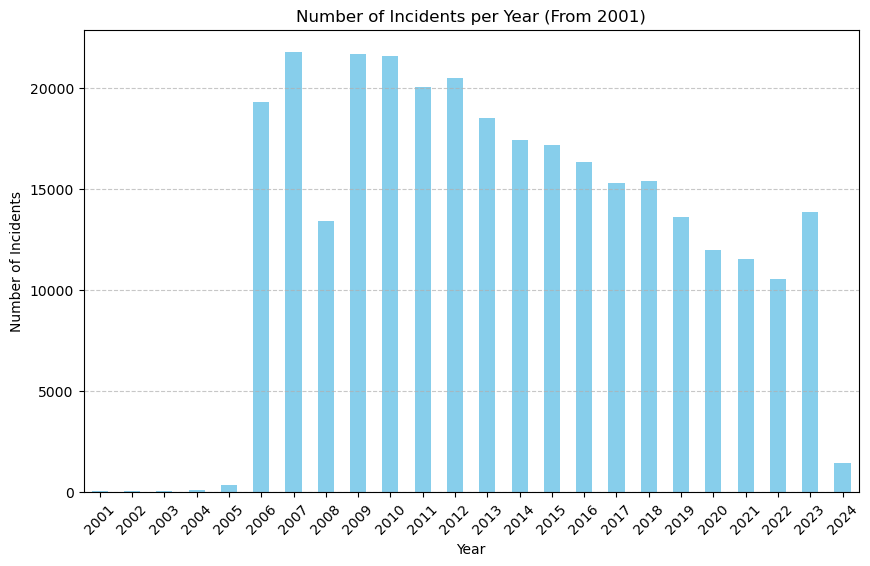

In [28]:
#01 Year v/s Incident count
import matplotlib.pyplot as plt

#Filtering the data to include only incidents from the year 2001 onwards
data_from_2001 = data[data['Year'] >= 2001]

#Counting the occurrences of each year in the filtered data
incident_count_per_year = data_from_2001['Year'].value_counts().sort_index()

#bar graph
plt.figure(figsize=(10, 6))
incident_count_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Incidents per Year (From 2001)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



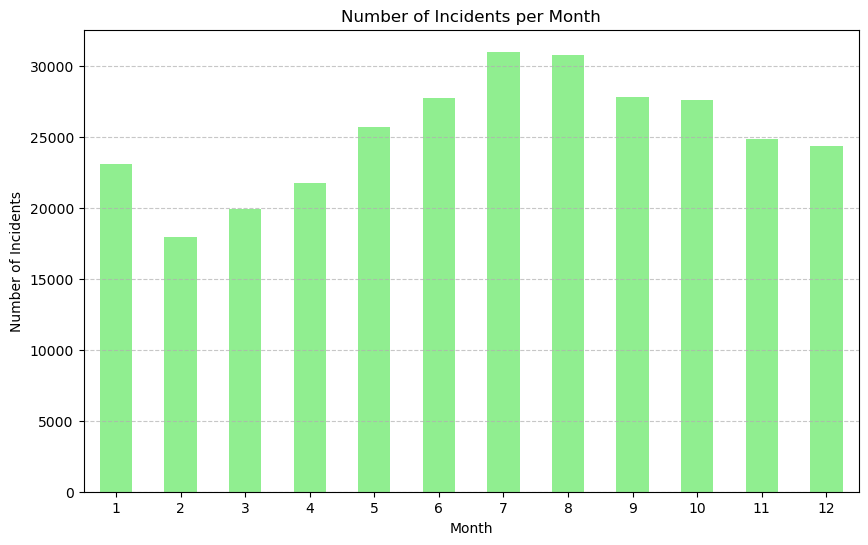

In [29]:
#EDA 02 Month v/s count
#Counting the occurrences of each month
incident_count_per_month = data['Month'].value_counts().sort_index()

#bar graph
plt.figure(figsize=(10, 6))
incident_count_per_month.plot(kind='bar', color='lightgreen')
plt.title('Number of Incidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)  # Keep x-axis labels vertical for months
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



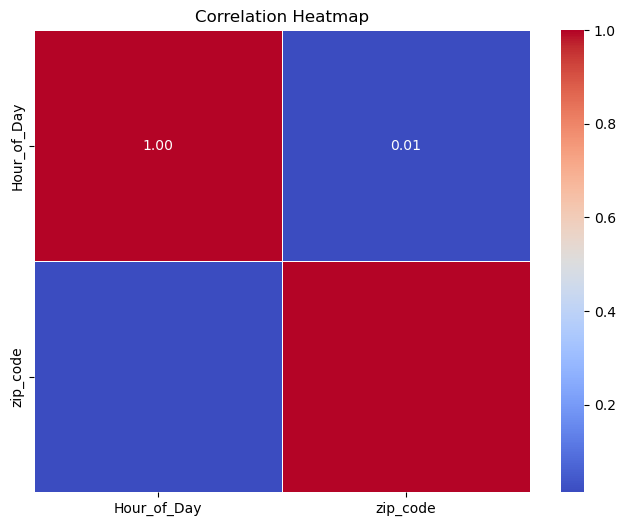

In [30]:
#EDA 3
#Correlation Plot between hour of day and zip code.
import seaborn as sns

numerical_columns = ['Hour_of_Day', 'zip_code']
correlation_matrix = data[numerical_columns].corr()

# Plotting the matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


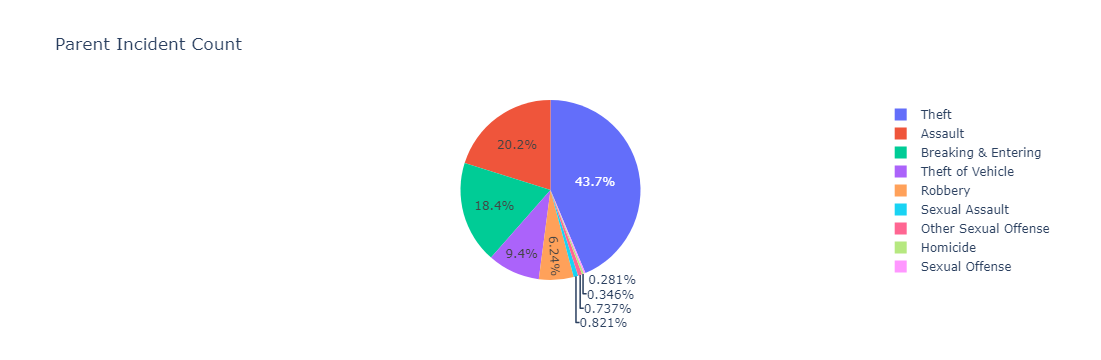

In [31]:
#EDA04 Parent Incident v/s Count
 #count of occurrence for each parent incident
parent_incident_count = data['Parent_Incident'].value_counts()

import plotly.express as px

parent_incident_count_df = parent_incident_count.reset_index()
parent_incident_count_df.columns = ['Parent_Incident', 'Count']

#pie chart
fig = px.pie(parent_incident_count_df, values='Count', names='Parent_Incident', title='Parent Incident Count')
fig.show()


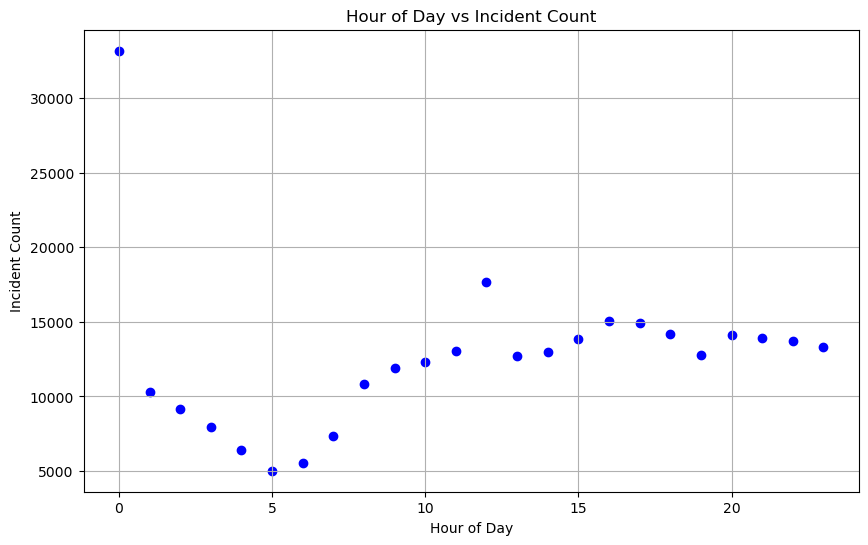

In [32]:
#EDA 05: Hour of day v/s Incident Count
#calculating incidents for each hour
hourly_incident_count = data.groupby('Hour_of_Day').size()

#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(hourly_incident_count.index, hourly_incident_count.values, color='blue')
plt.title('Hour of Day vs Incident Count')
plt.xlabel('Hour of Day')
plt.ylabel('Incident Count')
plt.grid(True)
plt.show()


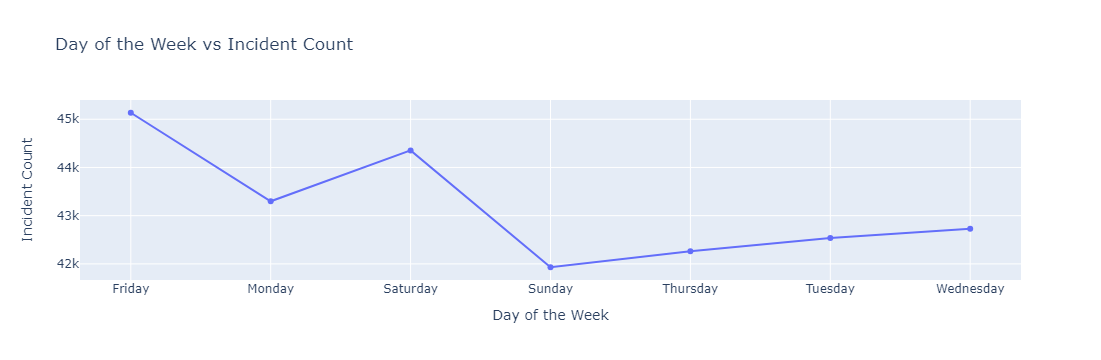

In [33]:
#EDA06 Day v/s Count
import plotly.graph_objects as go

#counting incidents for each day
daily_incident_count = data['Day'].value_counts().sort_index()

#Line Chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_incident_count.index, y=daily_incident_count.values,
                    mode='lines+markers',
                    name='Incident Count'))

fig.update_layout(title='Day of the Week vs Incident Count',
                  xaxis_title='Day of the Week',
                  yaxis_title='Incident Count')
fig.show()


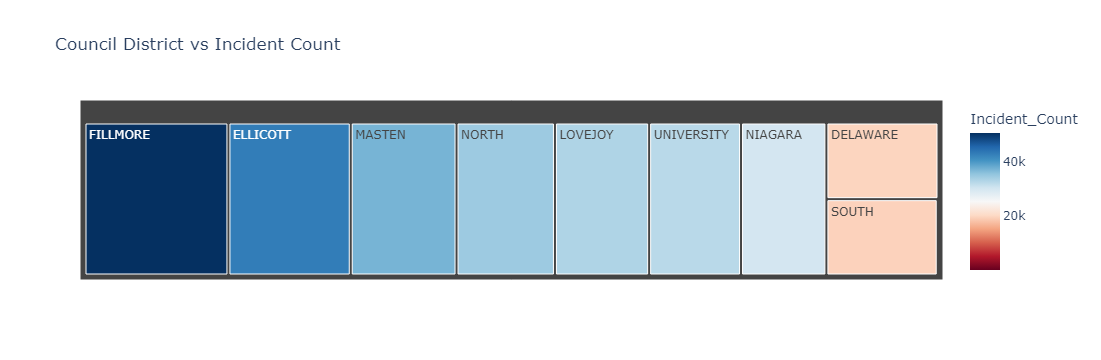

In [34]:
#EDA07 Council District v/s Count
import plotly.express as px

district_incident_count = data['Council_District'].value_counts().reset_index()
district_incident_count.columns = ['Council_District', 'Incident_Count']

#treemap
fig = px.treemap(district_incident_count, path=['Council_District'], values='Incident_Count',
                 title='Council District vs Incident Count', color='Incident_Count',
                 color_continuous_scale='RdBu')

#hover info display
fig.update_traces(hoverinfo='label+value+percent entry')
fig.show()


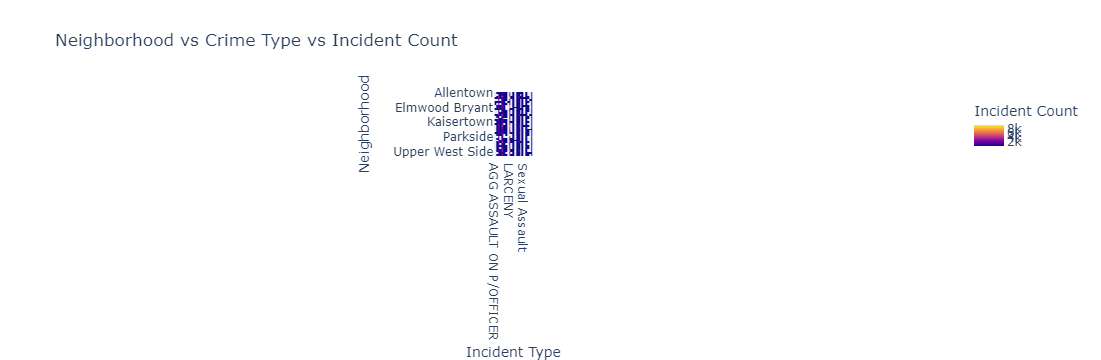

In [35]:
#EDA 08 Neighborhood v/s Crime Type v/s Incident Count

#Calculating count for each neighborhood and crime type
neighborhood_crime_count = data.groupby(['Neighborhood', 'Incident_Type']).size().reset_index(name='Incident_Count')

heatmap_data = neighborhood_crime_count.pivot(index='Neighborhood', columns='Incident_Type', values='Incident_Count')

#heatmap
fig = px.imshow(heatmap_data, labels=dict(x="Incident Type", y="Neighborhood", color="Incident Count"),
                x=heatmap_data.columns, y=heatmap_data.index,
                title='Neighborhood vs Crime Type vs Incident Count')

fig.update_layout(width=500) 
fig.show()



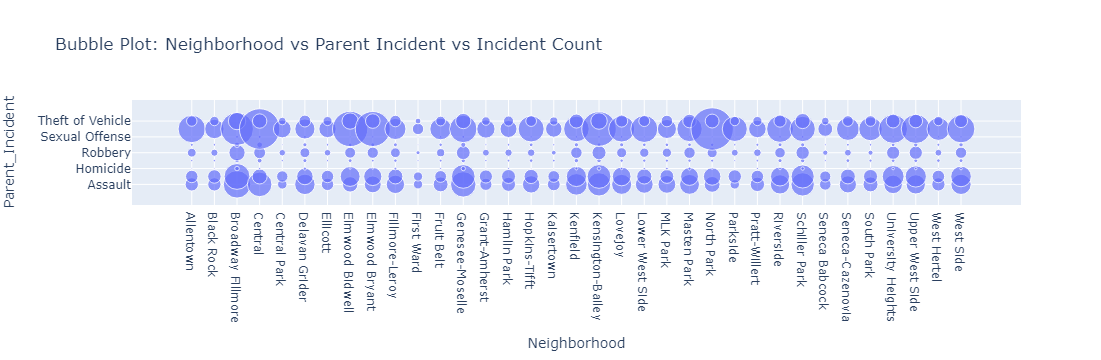

In [36]:
# EAD09 Neighborhood v/s parent Incident v/s Count

# Calculate the count for neighborhood and type
neighborhood_incident_count = data.groupby(['Neighborhood', 'Parent_Incident']).size().reset_index(name='Incident_Count')

# Bubble plot
fig = px.scatter(neighborhood_incident_count, x='Neighborhood', y='Parent_Incident', size='Incident_Count',
                 title='Bubble Plot: Neighborhood vs Parent Incident vs Incident Count',
                 size_max=30)  

fig.update_layout(xaxis_title='Neighborhood', yaxis_title='Parent_Incident')
fig.show()


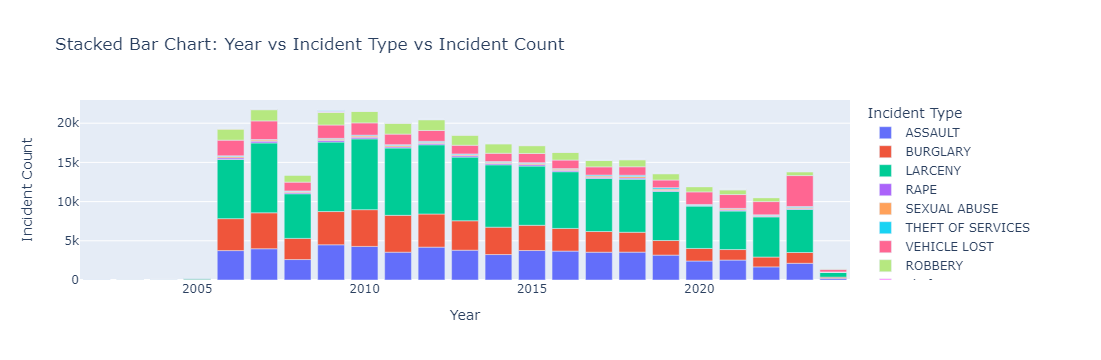

In [37]:
#EAD10 Stacked bar graph
#Filtering data for years after 2001
filtered_data = data[data['Year'] > 2001]

#calculating incident count
year_incident_count = filtered_data.groupby(['Year', 'Incident_Type']).size().reset_index(name='Incident_Count')

#Stacked Bar graph
fig = px.bar(year_incident_count, x='Year', y='Incident_Count', color='Incident_Type', 
             title='Stacked Bar Chart: Year vs Incident Type vs Incident Count',
             labels={'Year': 'Year', 'Incident_Count': 'Incident Count', 'Incident_Type': 'Incident Type'})

fig.show()



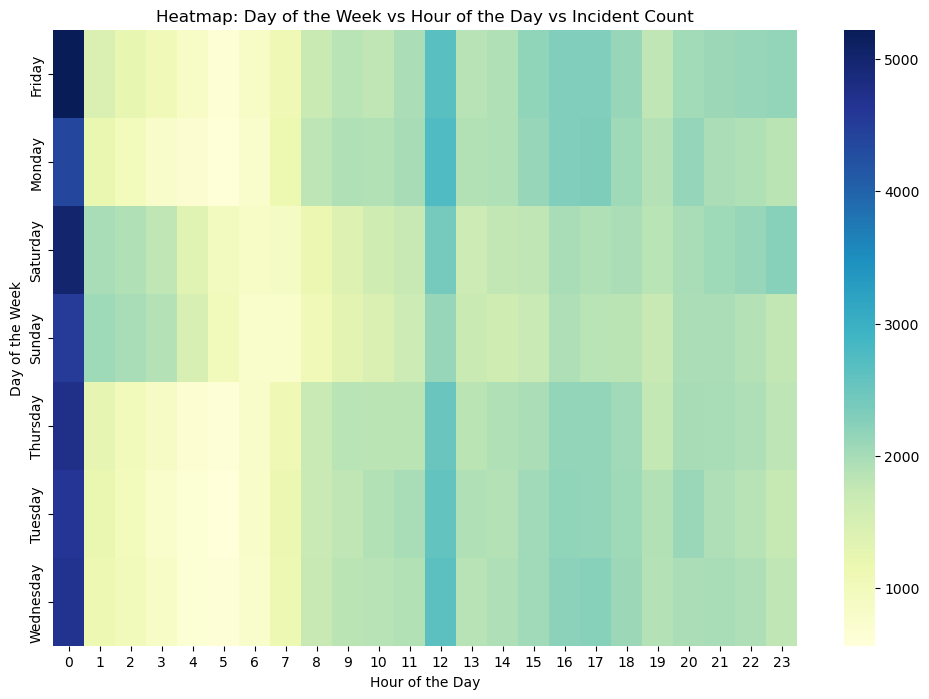

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Calculating count
incident_count = data.groupby(['Hour_of_Day', 'Day']).size().reset_index(name='Incident_Count')

# Heatmap
plt.figure(figsize=(12, 8))
pivot_table = incident_count.pivot(index='Day', columns='Hour_of_Day', values='Incident_Count')
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap: Day of the Week vs Hour of the Day vs Incident Count')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


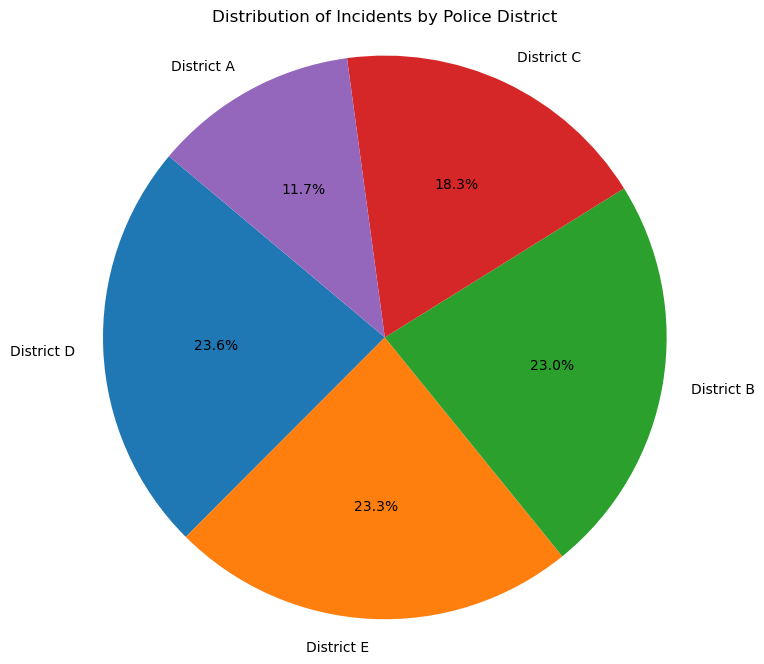

In [39]:
#EAD12 Police District v/s count
# Counting incidents
incident_count_by_district = data['Police_District'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(incident_count_by_district, labels=incident_count_by_district.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Incidents by Police District')
plt.axis('equal') 
plt.show()


In [40]:
data.head()

Case_Number  Incident_ID Incident_Type      Parent_Incident  Hour_of_Day  \
0    161660403            1       ASSAULT              Assault            1   
1    163480266            2       LARCENY                Theft            5   
3    143210732            2       LARCENY                Theft            8   
4    151100268            2       LARCENY                Theft           10   
5    151000814            3      BURGLARY  Breaking & Entering            3   

       Day                      Address  zip_code   Neighborhood  \
0  Tuesday  E AMHERST ST & E AMHERST ST     14207  Grant-Amherst   
1  Tuesday      1000 Block E LOVEJOY ST     14206        Lovejoy   
3   Monday        2100 Block ELMWOOD AV     14207    West Hertel   
4   Monday        2100 Block ELMWOOD AV     14207    West Hertel   
5   Friday        400 Block GLENWOOD AV     14208    Masten Park   

  Council_District Council District 2011 Police_District       Date      Time  \
0            NORTH                 NORTH      District D 2016-06-14  01:20:00   
1          LOVEJOY               LOVEJOY      District C 2016-12-13  05:00:00   
3            NORTH                 NORTH      District D 2014-11-17  08:08:00   
4            NORTH                 NORTH      District D 2015-04-20  10:22:00   
5           MASTEN                MASTEN      District C 2015-04-10  03:00:00   

   Year  Month  Council_District_Encoded  Hour_of_Day_Normalized  
0  2016      6                         6                0.043478  
1  2016     12                         3                0.217391  
3  2014     11                         6                0.347826  
4  2015      4                         6                0.434783  
5  2015      4                         4                0.130435

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Adding 'Incident_Type' to the selected columns
columns = ['Hour_of_Day', 'Day', 'zip_code', 'Council_District_Encoded', 'Neighborhood', 'Police_District', 'Parent_Incident']
df_selected = df_cleaned[columns]

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to categorical columns including 'Incident_Type'
for col in ['Day', 'Neighborhood', 'Police_District', 'Parent_Incident']:
    df_selected[col] = le.fit_transform(df_selected[col])

# Now calculate the correlation matrix for the selected and encoded columns
correlation_matrix = df_selected.corr()

# Display the correlation matrix
print(correlation_matrix)


                          Hour_of_Day       Day  zip_code  \
Hour_of_Day                  1.000000  0.008477  0.013189   
Day                          0.008477  1.000000  0.005109   
zip_code                     0.013189  0.005109  1.000000   
Council_District_Encoded     0.011831  0.002052  0.264341   
Neighborhood                 0.018596  0.003425  0.189194   
Police_District             -0.012397  0.003751  0.316672   
Parent_Incident              0.011017  0.001472  0.013619   

                          Council_District_Encoded  Neighborhood  \
Hour_of_Day                               0.011831      0.018596   
Day                                       0.002052      0.003425   
zip_code                                  0.264341      0.189194   
Council_District_Encoded                  1.000000      0.417887   
Neighborhood                              0.417887      1.000000   
Police_District                           0.271134      0.071498   
Parent_Incident                    

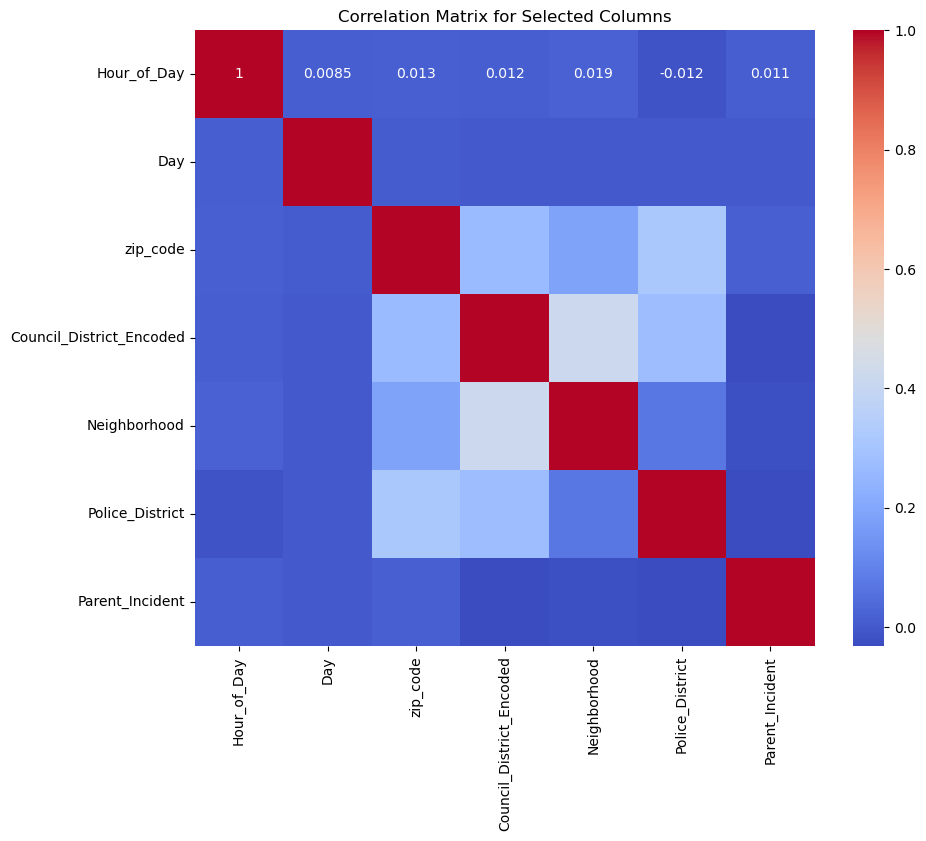

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Columns')
plt.show()


Accuracy: 0.4290667291973737
Confusion Matrix:
 [[    0     0     0     0     0     0     0 12192     0]
 [    0     0     0     0     0     0     0 11168     0]
 [    0     0     0     0     0     0     0   195     0]
 [    0     0     0     0     0     0     0   440     0]
 [    0     0     0     0     0     0     0  3831     0]
 [    0     0     0     0     0     0     0   477     0]
 [    0     0     0     0     0     0     0   147     0]
 [    0     0     0     0     0     0     0 25617     0]
 [    0     0     0     0     0     0     0  5637     0]]
Classification Report:
                       precision    recall  f1-score   support

             Assault       0.00      0.00      0.00     12192
 Breaking & Entering       0.00      0.00      0.00     11168
            Homicide       0.00      0.00      0.00       195
Other Sexual Offense       0.00      0.00      0.00       440
             Robbery       0.00      0.00      0.00      3831
      Sexual Assault       0.00      0.00

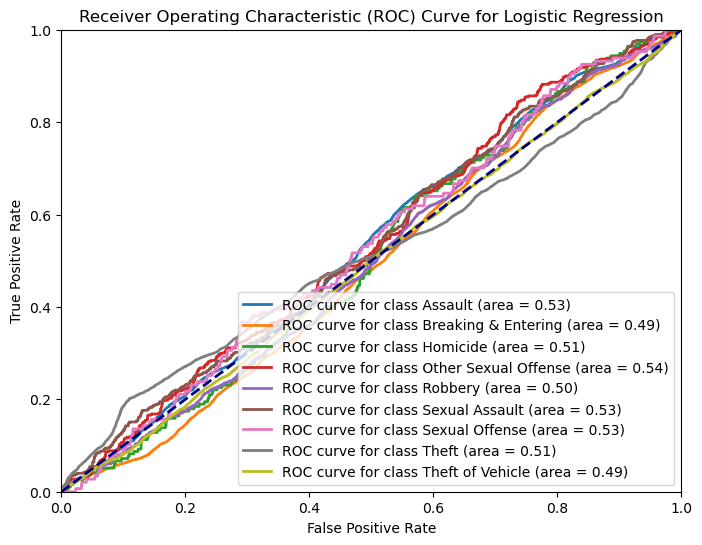

In [43]:
#1 Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Select features and target variable for classification
X = df_cleaned[['Hour_of_Day', 'Day', 'zip_code', 'Council_District_Encoded', 'Neighborhood', 'Police_District']]
y = df_cleaned['Parent_Incident']  

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs')
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optionally, print a confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Predict probabilities for each class in the test set
y_scores_lr = lr_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
for i in range(len(lr_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == lr_model.classes_[i], y_scores_lr[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {lr_model.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


Multinomial Naive Bayes Accuracy: 0.41283666086024384
Confusion Matrix:
 [[ 4012  2742     0     5     0     0     0 11409     0]
 [ 2832  2700     0     0     0     0     0 10996     0]
 [   93    60     0     0     0     0     0   156     0]
 [   99   128     0     0     0     0     0   422     0]
 [ 1223   806     0     1     0     0     0  3655     0]
 [  103   148     0     1     0     0     0   461     0]
 [   54    27     0     0     0     0     0   153     0]
 [ 4470  4056     0    12     0     0     0 30260     0]
 [ 1520  1246     0     1     0     0     0  5705     0]]
Classification Report:
                       precision    recall  f1-score   support

             Assault       0.28      0.22      0.25     18168
 Breaking & Entering       0.23      0.16      0.19     16528
            Homicide       0.00      0.00      0.00       309
Other Sexual Offense       0.00      0.00      0.00       649
             Robbery       0.00      0.00      0.00      5685
      Sexual Ass

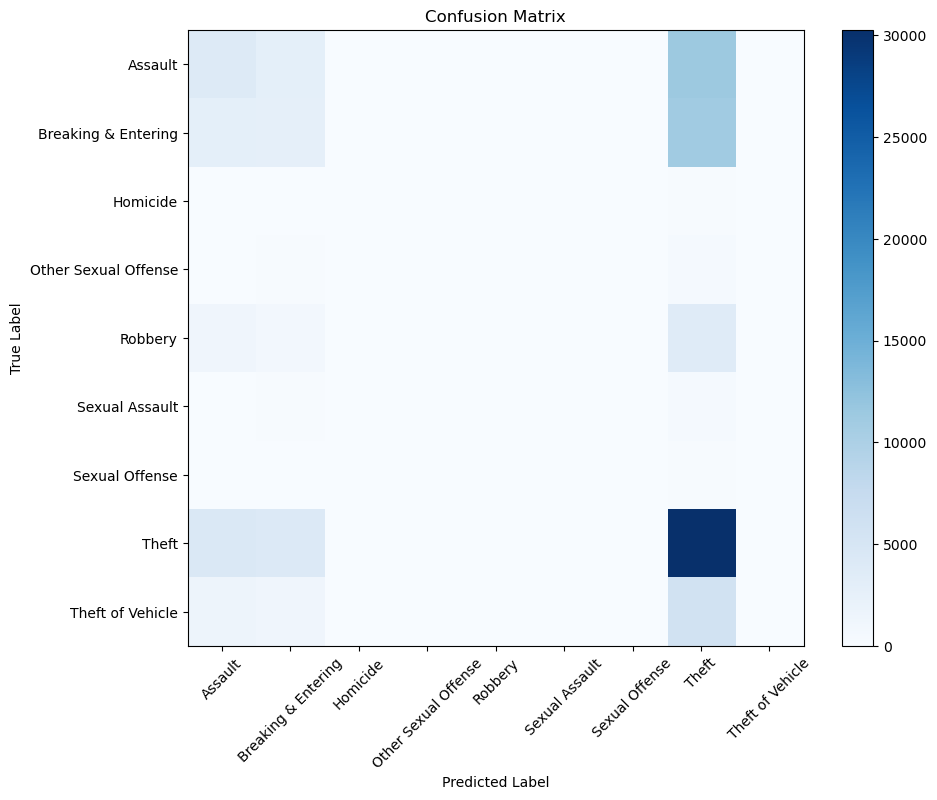

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Multinomial Naive Bayes model
mnb_model = MultinomialNB()
ovr_classifier = OneVsRestClassifier(mnb_model)
ovr_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_prob = ovr_classifier.predict_proba(X_test)

# Calculate accuracy
accuracy_mnb = accuracy_score(y_test, ovr_classifier.predict(X_test))
print("Multinomial Naive Bayes Accuracy:", accuracy_mnb)

# Optionally, print a confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, ovr_classifier.predict(X_test))
class_report = classification_report(y_test, ovr_classifier.predict(X_test))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Convert y_test back to integer labels if it's one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)


Gaussian Naive Bayes Accuracy: 0.21200142927330384
Confusion Matrix:
 [[  912  1841  7817  1272  1174    47   763  3997   345]
 [  781  2000  6465  1049  1562    14   637  3689   331]
 [   12    36   178    12    19     0     4    43     5]
 [   24    79   247    52    46     0    26   160    15]
 [  233   568  2391   253   546     4   247  1336   107]
 [   38    69   271    40    64     2    23   194    12]
 [    6    33    86    25    13     0    13    54     4]
 [ 1541  3768 10762  2501  2821    42  1623 15137   603]
 [  338   897  3210   530   630    10   357  2354   146]]
Classification Report:
                       precision    recall  f1-score   support

             Assault       0.23      0.05      0.08     18168
 Breaking & Entering       0.22      0.12      0.15     16528
            Homicide       0.01      0.58      0.01       309
Other Sexual Offense       0.01      0.08      0.02       649
             Robbery       0.08      0.10      0.09      5685
      Sexual Assaul

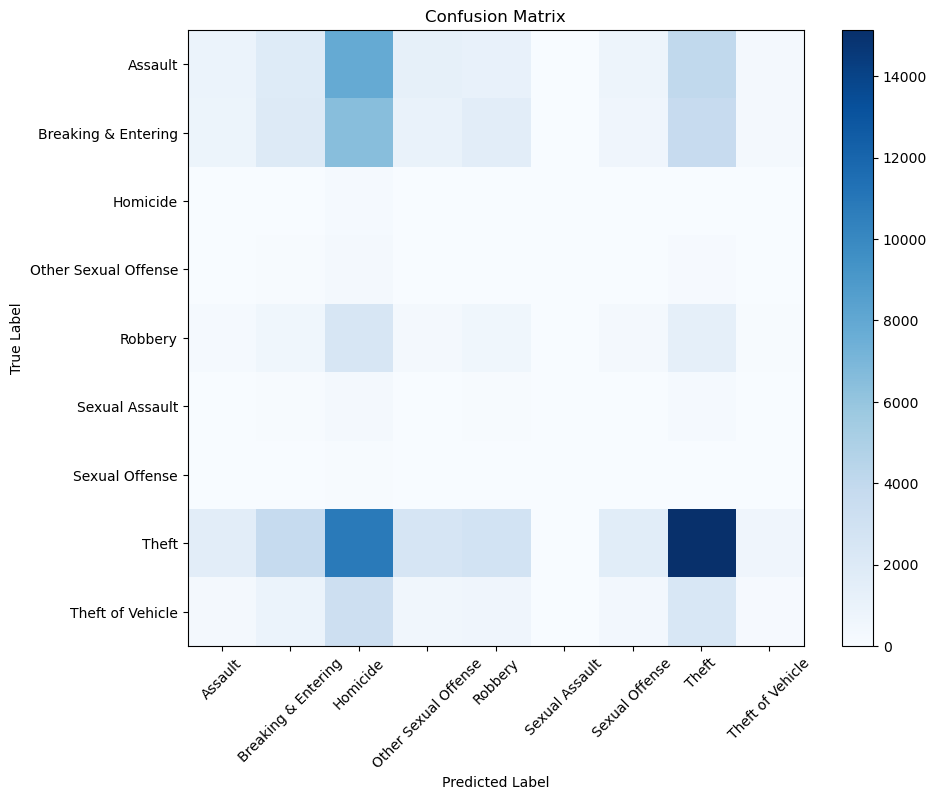

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb_model.predict(X_test)

# Calculate accuracy
accuracy_gnb = accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes Accuracy:", accuracy_gnb)

# Optionally, print a confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Get the unique classes from y_test
classes = np.unique(y_test)

# Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Here we applied logistic regression and we got the Accuracy of 43%, here we applied logistic regression instead of linear regression. linear regression is used when the target variable is continous variable, logistic ression is used when the target variable is categorical variable.

Here when we used Navie Bayes and got 41% accuracy, we used multinomial navie bayes as this variant is suitable for count data or features that represent counts or frequencies.

KNN Accuracy: 0.4467037384429854
Confusion Matrix:
 [[ 3769   571     0     0     0     0     0 13828     0]
 [ 1856  1048     0     0     0     0     0 13624     0]
 [   88     8     0     0     0     0     0   213     0]
 [   93    18     0     0     0     0     0   538     0]
 [ 1127   158     0     0     0     0     0  4400     0]
 [  154    19     0     0     0     0     0   540     0]
 [   34     9     0     0     0     0     0   191     0]
 [ 2743   867     0     0     0     0     0 35188     0]
 [ 1169   343     0     0     0     0     0  6960     0]]
Classification Report:
                       precision    recall  f1-score   support

             Assault       0.34      0.21      0.26     18168
 Breaking & Entering       0.34      0.06      0.11     16528
            Homicide       0.00      0.00      0.00       309
Other Sexual Offense       0.00      0.00      0.00       649
             Robbery       0.00      0.00      0.00      5685
      Sexual Assault       0.00      

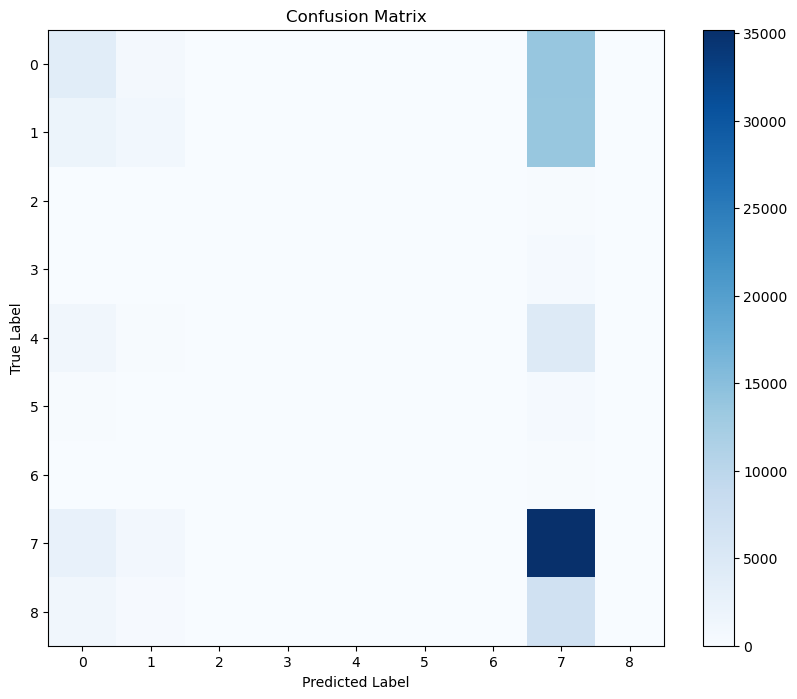

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=250)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_knn)
print("Classification Report:\n", class_report)

# Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Here we used KNN and got 36.42% accuracy. knn can be used to solve the regression and classification problems.
# here we can see that the accuracy increases as we increase the n_neighbors because as larger n_neighbour as decision is made on the 
# is based on the large datapoints which is efficetive for reducing noise and potentially leading to a more balanced decisions.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neighbors_range = range(1, 350,50)


accuracy_scores = []

for n_neighbors in neighbors_range:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Here we used KNN and got 36.42% accuracy. knn can be used to solve the regression and classification problems. here we can see that the accuracy increases as we increase the n_neighbors because as larger n_neighbour as decision is made on the is based on the large datapoints which is efficetive for reducing noise and potentially leading to a more balanced decisions.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Initialize and fit the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None).fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=dt_model.classes_)

# Compute precision-recall curve and PR AUC for each class
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(len(dt_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], dt_model.predict_proba(X_test)[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plot precision-recall curves
plt.figure()
for i in range(len(dt_model.classes_)):
    plt.plot(recall[i], precision[i], lw=2, label='Class {0} (PR AUC = {1:0.2f})'.format(i, pr_auc[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


# Initialize and fit the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optionally, print a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


In [ ]:

# # Initialize and fit the Random Forest model
# rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)  # 100 trees
# rf_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred_rf = rf_model.predict(X_test)

# # Calculate accuracy
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# print("Random Forest Accuracy:", accuracy_rf)

# # Optionally, print a confusion matrix and classification report
# conf_matrix = confusion_matrix(y_test, y_pred_rf)
# class_report = classification_report(y_test, y_pred_rf)
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)

# # Compute Precision-Recall curve for each class
# plt.figure(figsize=(8, 6))
# for i in range(len(rf_model.classes_)):
#     precision, recall, _ = precision_recall_curve(y_test == rf_model.classes_[i], rf_model.predict_proba(X_test)[:, i])
#     average_precision = average_precision_score(y_test == rf_model.classes_[i], rf_model.predict_proba(X_test)[:, i])
#     plt.plot(recall, precision, lw=2, label=f'Class {rf_model.classes_[i]} (AP={average_precision:.2f})')

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title('Precision-Recall Curve')
# plt.legend(loc="lower left")
# plt.show()



In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and fit the Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbm = gbm_model.predict(X_test)

# Calculate accuracy
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("GBM Accuracy:", accuracy_gbm)

# Optionally, print a confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred_gbm)
class_report = classification_report(y_test, y_pred_gbm)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


GBM Accuracy: 0.4482223413283309
Confusion Matrix:
 [[ 3571   362     0     0     1     0     0 14233     1]
 [ 1709   695     0     0     0     0     0 14123     1]
 [   82     5     0     0     0     0     0   222     0]
 [   87     8     0     0     0     0     0   554     0]
 [ 1055   101     0     0     2     0     0  4526     1]
 [  140    17     0     0     1     0     0   555     0]
 [   34     5     0     0     0     0     0   195     0]
 [ 2404   520     0     0     1     0     0 35873     0]
 [ 1071   225     0     0     0     0     0  7176     0]]
Classification Report:
                       precision    recall  f1-score   support

             Assault       0.35      0.20      0.25     18168
 Breaking & Entering       0.36      0.04      0.08     16528
            Homicide       0.00      0.00      0.00       309
Other Sexual Offense       0.00      0.00      0.00       649
             Robbery       0.40      0.00      0.00      5685
      Sexual Assault       0.00      

Accuracy: 0.41627026664880074
Confusion Matrix:
[[ 2970  1226     3    12   142     6     0  7581   252]
 [ 1751  1565     2     7   116     7     1  7490   229]
 [   51    21     0     0     2     0     0   115     6]
 [   75    38     0     1     6     0     0   311     9]
 [  815   382     1     1    69     3     1  2474    85]
 [  111    47     0     1     7     0     0   305     6]
 [   29    17     0     1     2     0     0    95     3]
 [ 2907  2003     4    11   176     8     2 20093   413]
 [  994   614     3     1    62     1     1  3806   155]]

Feature Importance:
Hour_of_Day: 0.6165920108932541
zip_code: 0.09027254820742663
Council_District_Encoded: 0.06730789459126842
Neighborhood_North Park: 0.015670457860131853
Day_Sunday: 0.013440605613908448
Day_Wednesday: 0.013371495227582929
Day_Friday: 0.013339401817977931
Day_Thursday: 0.013025108730546155
Day_Tuesday: 0.01297935700235555
Day_Monday: 0.012790342018568933
Day_Saturday: 0.012755975217221114
Police_District_District 

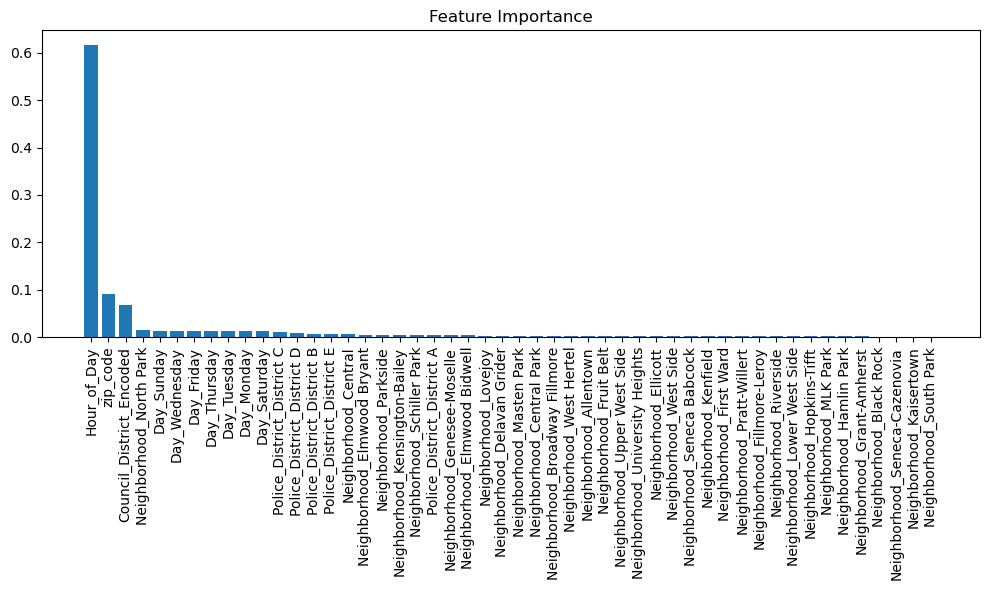

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Select features and target variable for classification
X = df_cleaned[['Hour_of_Day', 'Day', 'zip_code', 'Council_District_Encoded', 'Neighborhood', 'Police_District']]
y = df_cleaned['Parent_Incident']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest classification model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Feature Importance
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
features = X.columns

print("\nFeature Importance:")
for i in sorted_idx:
    print(f"{features[i]}: {feature_importance[i]}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[sorted_idx], rotation=90)
plt.tight_layout()
plt.show()


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming df_cleaned is your DataFrame containing the data

# Select features and target variable for classification
X = df_cleaned[['Hour_of_Day', 'Day', 'zip_code', 'Council_District_Encoded', 'Neighborhood', 'Police_District']]
y = df_cleaned['Parent_Incident']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optionally, print a confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.4443923355219081
Confusion Matrix:
 [[ 2934   450     0     0     4     0     0  8791    13]
 [ 1458   829     0     0     1     0     0  8870    10]
 [   60     6     0     0     0     0     0   129     0]
 [   75    15     0     0     0     0     0   350     0]
 [  845   113     0     0     6     0     0  2866     1]
 [  124    20     0     0     0     0     0   333     0]
 [   26     8     0     0     0     0     0   112     1]
 [ 2192   654     0     0     4     0     0 22754    13]
 [  905   282     0     0     5     0     0  4436     9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.24      0.28     12192
           1       0.35      0.07      0.12     11168
           2       0.00      0.00      0.00       195
           3       0.00      0.00      0.00       440
           4       0.30      0.00      0.00      3831
           5       0.00      0.00      0.00       477
           6       0.00      0.00  